# Lab 3: Gesture Recognition using Convolutional Neural Networks

In this lab you will train a convolutional neural network to make classifications on different hand gestures. By the end of the lab, you should be able to:

1. Load and split data for training, validation and testing
2. Train a Convolutional Neural Network
3. Apply transfer learning to improve your model

Note that for this lab we will not be providing you with any starter code. You should be able to take the code used in previous labs, tutorials and lectures and modify it accordingly to complete the tasks outlined below.

### What to submit

Submit a PDF file containing all your code, outputs, and write-up
from parts 1-5. You can produce a PDF of your Google Colab file by
going to **File > Print** and then save as PDF. The Colab instructions
has more information. Make sure to review the PDF submission to ensure that your answers are easy to read. Make sure that your text is not cut off at the margins. 

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

## Colab Link

Include a link to your colab file here

Colab Link: https://colab.research.google.com/drive/1n7wklnqsOe1IuW6JVJzMEJuXe708yqwA?usp=sharing

## Dataset

American Sign Language (ASL) is a complete, complex language that employs signs made by moving the
hands combined with facial expressions and postures of the body. It is the primary language of many
North Americans who are deaf and is one of several communication options used by people who are deaf or
hard-of-hearing. The hand gestures representing English alphabet are shown below. This lab focuses on classifying a subset
of these hand gesture images using convolutional neural networks. Specifically, given an image of a hand
showing one of the letters A-I, we want to detect which letter is being represented.

![alt text](https://www.disabled-world.com/pics/1/asl-alphabet.jpg)

## Part B. Building a CNN [50 pt]

For this lab, we are not going to give you any starter code. You will be writing a convolutional neural network
from scratch. You are welcome to use any code from previous labs, lectures and tutorials. You should also
write your own code.

You may use the PyTorch documentation freely. You might also find online tutorials helpful. However, all
code that you submit must be your own.

Make sure that your code is vectorized, and does not contain obvious inefficiencies (for example, unecessary
for loops, or unnecessary calls to unsqueeze()). Ensure enough comments are included in the code so that
your TA can understand what you are doing. It is your responsibility to show that you understand what you
write.

**This is much more challenging and time-consuming than the previous labs.** Make sure that you
give yourself plenty of time by starting early.

### 1. Data Loading and Splitting [5 pt]

Download the anonymized data provided on Quercus. To allow you to get a heads start on this project we will provide you with sample data from previous years. Split the data into training, validation, and test sets.

Note: Data splitting is not as trivial in this lab. We want our test set to closely resemble the setting in which
our model will be used. In particular, our test set should contain hands that are never seen in training!

Explain how you split the data, either by describing what you did, or by showing the code that you used.
Justify your choice of splitting strategy. How many training, validation, and test images do you have?

For loading the data, you can use plt.imread as in Lab 1, or any other method that you choose. You may find
torchvision.datasets.ImageFolder helpful. (see https://pytorch.org/docs/stable/torchvision/datasets.html?highlight=image%20folder#torchvision.datasets.ImageFolder
) 

In [ ]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# So it is pretty much impossible to share datasets over google drive unless you have a shared drive
# But Colab lets you directly clone git repos, so just run this block
import time

start_time = time.time()

!git clone https://github.com/Sidd-T/APS360-Pokemon-Data.git

end_time = time.time()
elapsed_time = end_time - start_time
print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

#After this the files should be in the session

Cloning into 'APS360-Pokemon-Data'...
remote: Enumerating objects: 40741, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 40741 (delta 5), reused 14 (delta 2), pack-reused 40724
Receiving objects: 100% (40741/40741), 736.35 MiB | 16.78 MiB/s, done.
Resolving deltas: 100% (958/958), done.
Checking out files: 100% (48377/48377), done.
Total time elapsed: 52.94 seconds


In [ ]:
import csv
import numpy as np
import random
import torch
import torch.utils.data

import pandas as pd

In [ ]:
pokemon_ordered = pd.read_csv('/content/APS360-Pokemon-Data/labelled_set/pokemon.csv')
pokemon_ordered = pokemon_ordered[["Name", "Type1", "Type2"]]
pokemon_t1 = pd.read_csv('/content/APS360-Pokemon-Data/labelled_set/pokemon_by_primary_type.csv')
pokemon_t2 = pd.read_csv('/content/APS360-Pokemon-Data/labelled_set/pokemon_with_secondary_type_sorted.csv')

In [ ]:
import matplotlib.pyplot as plt
import re
from os import listdir
from os.path import isfile, join

catcols = ["Bug", "Dark", "Dragon", "Electric", "Fairy", "Fighting", "Fire", "Flying", "Ghost", 
           "Grass","Ground", "Ice", "Normal", "Poison", "Psychic", "Rock", "Steel", "Water"]

img_path = []
names = []

IMG_DIR = '/content/APS360-Pokemon-Data/labelled_set/images'

files = [f for f in listdir(IMG_DIR) if isfile(join(IMG_DIR, f))]
for img in files:
    pokemon_name = img.split('.')
    path = IMG_DIR +'/' +str(img)
    img_path.append(path)
    names.append(pokemon_name[0])

img_df = pd.DataFrame([])
img_df['img_path'] = img_path
img_df['Name'] = names

img_df[:9]

,img_path,Name
0,/content/APS360-Pokemon-Data/labelled_set/imag...,staryu
1,/content/APS360-Pokemon-Data/labelled_set/imag...,regirock
2,/content/APS360-Pokemon-Data/labelled_set/imag...,deino
3,/content/APS360-Pokemon-Data/labelled_set/imag...,luxio
4,/content/APS360-Pokemon-Data/labelled_set/imag...,morelull
5,/content/APS360-Pokemon-Data/labelled_set/imag...,cubchoo
6,/content/APS360-Pokemon-Data/labelled_set/imag...,ambipom
7,/content/APS360-Pokemon-Data/labelled_set/imag...,frillish
8,/content/APS360-Pokemon-Data/labelled_set/imag...,buizel


In [ ]:
type_num = []
image = []

for i, row in pokemon_ordered.iterrows():
  type_num.append(catcols.index(row["Type1"]))
  for j, row2 in img_df.iterrows():
    if row["Name"] == row2["Name"]:
      path = row2["img_path"]
      break
    else:
      continue
  image.append(path)  

pokemon_ordered["type_num"] = type_num
pokemon_ordered["image"] = image

sub_po = pokemon_ordered[["image", "type_num"]]
sub_po[:9]

,image,type_num
0,/content/APS360-Pokemon-Data/labelled_set/imag...,9
1,/content/APS360-Pokemon-Data/labelled_set/imag...,9
2,/content/APS360-Pokemon-Data/labelled_set/imag...,9
3,/content/APS360-Pokemon-Data/labelled_set/imag...,6
4,/content/APS360-Pokemon-Data/labelled_set/imag...,6
5,/content/APS360-Pokemon-Data/labelled_set/imag...,6
6,/content/APS360-Pokemon-Data/labelled_set/imag...,17
7,/content/APS360-Pokemon-Data/labelled_set/imag...,17
8,/content/APS360-Pokemon-Data/labelled_set/imag...,17


In [ ]:
import os

os.mkdir('/content/APS360-Pokemon-Data/labels')

In [ ]:
parent_path = '/content/APS360-Pokemon-Data/labels/'
for i in range(18):
  dir_path = parent_path + str(i)
  print(dir_path)
  os.mkdir(dir_path)

/content/APS360-Pokemon-Data/labels/0
/content/APS360-Pokemon-Data/labels/1
/content/APS360-Pokemon-Data/labels/2
/content/APS360-Pokemon-Data/labels/3
/content/APS360-Pokemon-Data/labels/4
/content/APS360-Pokemon-Data/labels/5
/content/APS360-Pokemon-Data/labels/6
/content/APS360-Pokemon-Data/labels/7
/content/APS360-Pokemon-Data/labels/8
/content/APS360-Pokemon-Data/labels/9
/content/APS360-Pokemon-Data/labels/10
/content/APS360-Pokemon-Data/labels/11
/content/APS360-Pokemon-Data/labels/12
/content/APS360-Pokemon-Data/labels/13
/content/APS360-Pokemon-Data/labels/14
/content/APS360-Pokemon-Data/labels/15
/content/APS360-Pokemon-Data/labels/16
/content/APS360-Pokemon-Data/labels/17


In [ ]:
import shutil

for i, row in sub_po.iterrows():
  src = row["image"]
  dest = '/content/APS360-Pokemon-Data/labels/' + str(row["type_num"])
  shutil.copy2(src, dest)

In [ ]:
def get_data_loader(batch_size, path='/content/APS360-Pokemon-Data/labels/'):
    torch.manual_seed(0)
    
    # these are prerequisite for using googleNet, according to https://pytorch.org/hub/pytorch_vision_googlenet/
    # challenge 1 (image small)
    transform = transforms.Compose([
      transforms.Resize(256),
      transforms.CenterCrop(224),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
      ])

    fullset = torchvision.datasets.ImageFolder(root=path, transform=transform)

    #from lab 2, 2/3 is training, 1/6 is test, 1/6 is val

    trainSetSize = int(len(fullset) * 2 / 3)
    valSetSize = int(len(fullset) * 1 / 6)
    testSetSize = len(fullset) - trainSetSize - valSetSize

    train_set, val_set, test_set = data.random_split(fullset, [trainSetSize, valSetSize, testSetSize])

    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,num_workers=1)
    val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size,num_workers=1)
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size,num_workers=1)
    # length of loader is how many batches the set was split into
    return train_loader, val_loader, test_loader

### 2. Model Building and Sanity Checking [15 pt]

### Part (a) Convolutional Network - 5 pt

Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts the gesture
letter. Your model should be a subclass of nn.Module. Explain your choice of neural network architecture: how
many layers did you choose? What types of layers did you use? Were they fully-connected or convolutional?
What about other decisions like pooling layers, activation functions, number of channels / hidden units?

In [ ]:
# helper functions
# get_data_loader(batch_size) from above above

def get_model_name(name, batch_size, learning_rate, epoch):
    path = "/content/gdrive/MyDrive/Project/michaelBaseLineTesting/model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

def evaluate(net, loader, criterion):
    total_loss = 0.0
    total_corr = 0.0
    total_epoch = 0
    for i, data in enumerate(loader, 0):
        inputs, labels = data
        outputs = net(inputs)

        loss = criterion(outputs, labels)
        total_loss += loss.item()

        pred = outputs.max(1, keepdim=True)[1]
        total_corr += pred.eq(labels.view_as(pred)).sum().item() # so this == 2 pytorch tensors element-wise
        
        total_epoch += len(labels)
    acc = float(total_corr) / total_epoch
    loss = float(total_loss) / (i + 1)
    return acc, loss

# Training Curve
def plot_training_curve(path):
    import matplotlib.pyplot as plt
    train_acc = np.loadtxt("{}_train_acc.csv".format(path))
    val_acc = np.loadtxt("{}_val_acc.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Accuracy")
    n = len(train_acc) # number of epochs
    plt.plot(range(1,n+1), train_acc, label="Train")
    plt.plot(range(1,n+1), val_acc, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

In [ ]:
# The endoder has 2 convolution layers, each followed by a relu activation and then a max pooling layer. Then 2 fully connected layer for classifier
# This inital design is based on large net from lab 2 since it was shown to work. 

class michaelNet(nn.Module):
    def __init__(self):
        super(michaelNet, self).__init__()
        self.name = "michaelNet"
        self.conv1 = nn.Conv2d(3, 5, 12, 4) # 3 channel for RGB, 5 output channel, kernel = 12, stride 4
        self.pool = nn.MaxPool2d(2, 2) # 2*2 kernel, stride 2
        self.conv2 = nn.Conv2d(5, 10, 5,2)
        self.fc1 = nn.Linear(360, 32) # see justification for below
        self.fc2 = nn.Linear(32, 9) # 32 hidden units is carried from large net, 9 output cuz classifying 9 letters

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 360)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        # x = x.squeeze(1) # Flatten to [batch_size]
        return x

"""
224*224 (3ch) --> conv 1 --> 54*54 (5ch) ((224-12)/4 + 1) 
54*54 (5ch) --> max pool --> 27*27 (5ch)
27*27 (5ch) --> conv 2 --> 12*12 (10ch) ((27 - 5)/2 + 1)
12*12 (10ch) --> max pool --> 6*6 (10ch)
6*6*10 = 360 input for fc1
"""

'\n224*224 (3ch) --> conv 1 --> 54*54 (5ch) ((224-12)/4 + 1) \n54*54 (5ch) --> max pool --> 27*27 (5ch)\n27*27 (5ch) --> conv 2 --> 12*12 (10ch) ((27 - 5)/2 + 1)\n12*12 (10ch) --> max pool --> 6*6 (10ch)\n6*6*10 = 360 input for fc1\n'

### Part (b) Training Code - 5 pt

Write code that trains your neural network given some training data. Your training code should make it easy
to tweak the usual hyperparameters, like batch size, learning rate, and the model object itself. Make sure
that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice
of loss function and optimizer.

In [ ]:
def train(model, batch_size=64, learning_rate=0.01, num_epochs=24):
    torch.manual_seed(1000)

    train_loader, val_loader, test_loader = get_data_loader(batch_size=batch_size)
        
    # now use cross entropy since it's not a binary choice.
    # using SGD with momentum because SGD explores a lot of possibilty space, 
    # and momentum helps accelerate SGD in the relevant direction and dampens oscillations
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    # arrays for keeping track of things
    train_acc = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_acc = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)

    # training
    start_time = time.time()
    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_train_corr = 0.0
        total_epoch = 0

        i = 0
        for imgs, labels in train_loader: # this for loop takes a long time to load all images in first iteration
            #imgs, labels = data
            #print(i)
            # gradient descent
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # Calculate the statistics
            total_train_loss += loss.item()
            #print(len(out), out)
            pred = out.max(1, keepdim=True)[1]
            #print(pred)
            total_train_corr += pred.eq(labels.view_as(pred)).sum().item()
            total_epoch += len(labels)
            i+=1
            
        train_acc[epoch] = float(total_train_corr) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i+1)
        val_acc[epoch], val_loss[epoch] = evaluate(model, val_loader, criterion)
        print(("Epoch {}: Train acc: {}, Train loss: {} | "+
               "Validation Accuracy: {}, Validation loss: {}").format(
                   epoch + 1,
                   train_acc[epoch],
                   train_loss[epoch],
                   val_acc[epoch],
                   val_loss[epoch]))
        
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)
  
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_acc.csv".format(model_path), train_acc)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_acc.csv".format(model_path), val_acc)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)

### 3. Hyperparameter Search [10 pt]

### Part (a) - 1 pt

List 3 hyperparameters that you think are most worth tuning. Choose at least one hyperparameter related to
the model architecture.

In [ ]:
# batch size, learning rate, num_epochs, more layers

### Part (b) - 5 pt

Tune the hyperparameters you listed in Part (a), trying as many values as you need to until you feel satisfied
that you are getting a good model. Plot the training curve of at least 4 different hyperparameter settings.

In [ ]:
# now to increase depth to 3 convolution layer

class michaelNetDeeper(nn.Module):
    def __init__(self):
        super(michaelNetDeeper, self).__init__()
        self.name = "michaelNetDeeper"
        self.conv1 = nn.Conv2d(3, 5, 11, 3) # 3 channel for RGB, 5 output channel, kernel = 11, stride 3
        self.pool1 = nn.MaxPool2d(2, 2) # 2*2 kernel, stride 2
        self.conv2 = nn.Conv2d(5, 10, 4, 2)
        self.conv3 = nn.Conv2d(10, 15, 3)
        self.pool2 = nn.MaxPool2d(3, 2)
        self.fc1 = nn.Linear(7*7*15, 254) # see justification for below
        self.fc2 = nn.Linear(254, 18) # 32 hidden units is carried from large net, 9 output cuz classifying 9 letters

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = self.pool2(F.relu(self.conv3(x)))
        x = x.view(-1, 7*7*15)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

"""
224*224 (3ch) --> conv 1 --> 54*54 (5ch) ((224-11)/3 + 1) 
72*72 (5ch) --> max pool 1 --> 36*36 (5ch)
36*36 (5ch) --> conv 2 --> 17*17 (10ch) ((36 - 4)/2 + 1)
17*17 (10ch) --> conv 3 --> 15*15 (15ch) ((17-3) + 1)
15*15 (15ch) --> max pool 2 --> 7*7 (15ch) ((15-3)/2 + 1)

7*7*15 for fc1
"""

'\n224*224 (3ch) --> conv 1 --> 54*54 (5ch) ((224-11)/3 + 1) \n72*72 (5ch) --> max pool 1 --> 36*36 (5ch)\n36*36 (5ch) --> conv 2 --> 17*17 (10ch) ((36 - 4)/2 + 1)\n17*17 (10ch) --> conv 3 --> 15*15 (15ch) ((17-3) + 1)\n15*15 (15ch) --> max pool 2 --> 7*7 (15ch) ((15-3)/2 + 1)\n\n7*7*15 for fc1\n'

In [ ]:
num_hidden_units = 32
# max pooling, 4 con layers and 3 pooling layers, small change from the proposal
# for better dimensions fed into the fc layers
class baselineClassifier(nn.Module):
    def __init__(self):
        super(baselineClassifier, self).__init__()
        self.name = "baselineModel"
        # RGB, output channels, kernel size,  stride 
        self.conv1 = nn.Conv2d(3, 5, 18, 2)
        self.pool = nn.MaxPool2d(2, 2) # 2*2 kernel, stride 2
        self.conv2 = nn.Conv2d(5, 7, 11, 3)
        self.conv3 = nn.Conv2d(7, 9, 5, 2)
        self.conv4 = nn.Conv2d(9, 11, 3, 2)
        # no pool4
        self.fc1 = nn.Linear(176, num_hidden_units)
        self.fc2 = nn.Linear(num_hidden_units, 18)

    def forward(self, x):
        # print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        # print(x.shape)
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)
        x = self.pool(F.relu(self.conv3(x)))
        # print(x.shape)
        x = F.relu(self.conv4(x))
        # print(x.shape)
        x = x.view(-1, 176)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
# NEED 18 AS FINAL OUTPUT FROM FC2 DUE TO 18 POKEMON TYPES

In [ ]:
myNet = baselineClassifier()
train(myNet, batch_size = 32, num_epochs = 36, learning_rate = 0.005)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


RuntimeError: ignored

In [ ]:
myNet = michaelNetDeeper()
train(myNet, batch_size = 32, num_epochs = 36, learning_rate = 0.005)

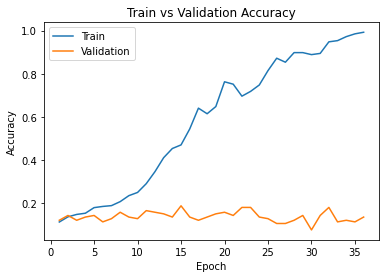

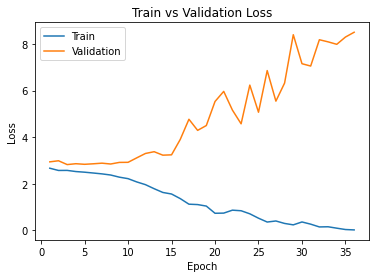

In [ ]:
model_path = get_model_name("michaelNetDeeper", batch_size = 32, epoch = 35, learning_rate=0.005)
plot_training_curve(model_path)

# best at Epoch 31: Train acc: 0.9722972972972973, Train loss: 0.07138941824436187 | Validation Accuracy: 0.8540540540540541, Validation loss: 0.6777972479661306

In [ ]:
model_path = get_model_name("michaelNetDeeper", batch_size = 32, epoch = 35, learning_rate=0.005)
plot_training_curve(model_path)
# best at Epoch 30: Train acc: 0.9905405405405405, Train loss: 0.02819463643512184 | Validation Accuracy: 0.8891891891891892, Validation loss: 0.7493736160298189

### Part (d) - 2 pt
Report the test accuracy of your best model. You should only do this step once and prior to this step you should have only used the training and validation data.

In [ ]:
bestMichael = michaelNetDeeper()
model_path = get_model_name("michaelNetDeeper", batch_size = 32, epoch = 14, learning_rate = 0.005)
state = torch.load(model_path)
bestMichael.load_state_dict(state)

criterion = nn.CrossEntropyLoss()
train_loader, val_loader, test_loader = get_data_loader(batch_size=32)
test_acc, test_loss = evaluate(bestMichael, test_loader, criterion)


print("Test accuracy is", test_acc, "Test loss is", test_loss)


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Test accuracy is 0.08823529411764706 Test loss is 3.343052291870117


In [ ]:
pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torchinfo

myModel = michaelNetDeeper()
torchinfo.summary(myModel, (3, 244, 244))

Layer (type:depth-idx)                   Output Shape              Param #
michaelNetDeeper                         [1, 18]                   --
├─Conv2d: 1-1                            [5, 78, 78]               1,820
├─MaxPool2d: 1-2                         [5, 39, 39]               --
├─Conv2d: 1-3                            [10, 18, 18]              810
├─Conv2d: 1-4                            [15, 16, 16]              1,365
├─MaxPool2d: 1-5                         [15, 7, 7]                --
├─Linear: 1-6                            [1, 254]                  186,944
├─Linear: 1-7                            [1, 18]                   4,590
Total params: 195,529
Trainable params: 195,529
Non-trainable params: 0
Total mult-adds (M): 1.37
Input size (MB): 0.71
Forward/backward pass size (MB): 0.30
Params size (MB): 0.78
Estimated Total Size (MB): 1.80